In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = clinical_data_df.merge(mouse_data_df, how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_data = combined_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
tumor_volume_data = tumor_volume_data.reset_index()

# Convert to DataFrame
tumor_volume_data_df = pd.DataFrame(tumor_volume_data)

# Preview DataFrame
tumor_volume_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Preview DataFrame
tumor_volume_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_data_sem = combined_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

tumor_volume_data_sem = tumor_volume_data_sem.reset_index()

# Convert to DataFrame
tumor_volume_data_sem_df = pd.DataFrame(tumor_volume_data_sem)

# Preview DataFrame
tumor_volume_data_sem_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [6]:
tumor_volume_data_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [31]:
# Minor Data Munging to Re-Format the Data Frames

tumor_volume_data_df.reset_index()
tumor_volume_data_sem_df.reset_index()

tumor_volume_data_df_pivot = tumor_volume_data_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_volume_data_df_sem_pivot = tumor_volume_data_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_volume_data_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [32]:
tumor_volume_data_df_pivot_filtered

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


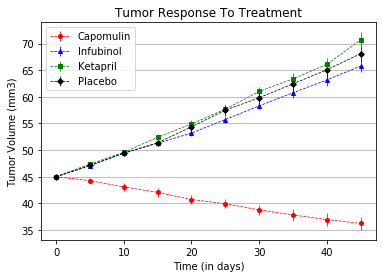

In [63]:
drugs_decors_dict = {
    #Drug name : [Color , marker]
    'Capomulin' : ['red', 'o'],
    'Infubinol' : ['blue', '^'],
    'Ketapril' : ['green', 's'],
    'Placebo' : ['black', 'D'],
}

# Generate the Plot (with Error Bars)
tumor_volume_data_df_pivot_filtered = tumor_volume_data_df_pivot.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_volume_data_sem_df_filtered = tumor_volume_data_df_sem_pivot.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

for k, v in drugs_decors_dict.items():
    plt.errorbar(tumor_volume_data_df_pivot_filtered.index, 
                tumor_volume_data_df_pivot_filtered[k],
                yerr=tumor_volume_data_sem_df_filtered[k],
                label=k,
                color=v[0], 
                marker=v[1],
                linestyle="dashed",
                linewidth=0.75,
                ms=4
                )

plt.xlabel('Time (in days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response To Treatment')
plt.legend(loc='best')
plt.grid(axis='y')

fig.tight_layout()

# Save the Figure

#fig.savefig("test.png")

In [64]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [71]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site_df = combined_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
meta_site_df = meta_site_df.reset_index()

# Preview DataFrame
meta_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [ ]:
meta_site_df.head()

In [72]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_site_sem_df = combined_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
meta_site_sem_df = meta_site_sem_df.reset_index()

# Preview DataFrame
meta_site_sem_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [ ]:
meta_site_sem_df.head()

In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [12]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [15]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [17]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)